In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
data = 'WHO-COVID-19-global-data.csv'
df = pd.read_csv(data)

In [3]:
def get_country_df(country):
    df.columns = [i.strip() for i in df.columns]
    df.rename(columns={'Date_reported' : 'Date'}, inplace = True)
    df['Date'] = pd.to_datetime(df['Date'])
    country_groups = df.groupby('Country')
    country_df = country_groups.get_group(country)
    return country_df

In [4]:
def get_cases(country, how = 'New_cases', start_date = None, end_date = None):
    country_df = get_country_df(country)
    country_df.set_index('Date', inplace = True)

    if start_date is None:
        filt = country_df[how] >= 1

        country_df = country_df[filt]
    
        return country_df.loc[:, [how]]
    
    else:
        return country_df.loc[start_date:end_date, [how]]

In [5]:
def get_deaths(country, how = 'New_deaths', start_date = None, end_date = None):
    country_df = get_country_df(country)
    country_df.set_index('Date', inplace = True)

    if start_date is None:

        filt = country_df[how] >= 1

        country_df = country_df[filt]

        return country_df.loc[:, [how]]

    else:
        return country_df.loc[start_date:end_date, [how]]

In [13]:
def get_country_dictionary(countries, plot, plot_type = 'line', animate=False, start_date = None, end_date = None):
    country_dictionary = {}
    
    for i in countries:
        if plot.lower() == "new cases":
            if plot_type != 'bar':
                country_dictionary[i] = get_cases(i)
            elif plot_type == 'bar' or animate:
                country_dictionary[i] = get_cases(i, start_date=start_date, end_date=end_date)
        
        elif plot.lower() == 'total cases':
            if plot_type != 'bar':
                country_dictionary[i] = get_cases(i, 'Cumulative_cases')
                
            elif plot_type == 'bar' or animate:
                country_dictionary[i] = get_cases(i, 'Cumulative_cases', start_date=start_date, end_date=end_date)
            
        elif plot.lower() == 'new deaths':
            if plot_type != 'bar':
                country_dictionary[i] = get_deaths(i)
            
            elif plot_type == 'bar' or animate:
                country_dictionary[i] = get_deaths(i, start_date=start_date, end_date=end_date)
            
        elif plot.lower() == 'total deaths':
            if plot_type != 'bar':
                country_dictionary[i] = get_deaths(i, 'Cumulative_deaths') 
            elif plot_type == 'bar' or animate:
                country_dictionary[i] = get_deaths(i, 'Cumulative_deaths', start_date=start_date, end_date=end_date)
                
       
    country_dictionary = {
        key: country_dictionary[key] 
        for key in sorted(country_dictionary, key = lambda k: len(country_dictionary[k]))
    }
        
    return country_dictionary

In [228]:
def plot_data(countries, plot = 'new cases', plot_type = 'line'):
    
    if not (isinstance(countries, list) or isinstance(countries, tuple)):
        raise TypeError("Please pass in a list/tuple of Country/Countries")
        return
    
    # country comes in as a list
     
    %matplotlib notebook    
    plt.style.use('seaborn-colorblind')
    
    if plot_type == 'line':
        fig, (ax1) = plt.subplots(1,1, figsize=(10, 5))
        axes = [ax1]
    
    else:
        num = len(countries) // 2 if len(countries) % 2 == 0 else len(countries) // 2 + 1
        
        fig, all_axis_objs = plt.subplots(num, 2, figsize=(10, 5))
        
        axes = []
        
        for i in range(all_axis_objs.shape[0]):
            for j in range(all_axis_objs.shape[1]):
                axes.append(all_axis_objs[i][j])

        axes = axes if len(countries) % 2 == 0 else axes[:-1]
   
    
    country_dictionary = get_country_dictionary(countries, plot, plot_type = 'line')
    
    
    keys = list(country_dictionary.keys())

    country_name = []
    country_data_x = []
    country_data_y = []
     
    for country in countries:   
        dates = country_dictionary[country].index
        
        country_name.append(country)
        country_data_x.append(dates)
        
        if plot.lower() == "new cases":
            country_data_y.append(country_dictionary[country]['New_cases'])
        
        elif plot.lower() == 'total cases':
            country_data_y.append(country_dictionary[country]['Cumulative_cases'])
            
        elif plot.lower() == 'new deaths':
            country_data_y.append(country_dictionary[country]['New_deaths'])
            
        elif plot.lower() == 'total deaths':
            country_data_y.append(country_dictionary[country]['Cumulative_deaths'])
        
        
        
        if plot_type == 'line':
            for index, data in enumerate(country_data_x):
                
                axes[0].set_ylabel(plot.upper())
                axes[0].set_xlabel('Month of 2020')
                
                axes[0].plot(country_data_x[index], country_data_y[index], label = country_name[index], alpha = 0.75)
                
                axes[0].tick_params(axis='x', rotation=35)
            
        
        else:
            for index, axis in enumerate(axes):
                if index < len(country_data_x):
                    axis.set_title(country_name[index])
                    axis.set_ylabel(plot.upper())
                    axis.set_xlabel('Month of 2020')
                    
                    axis.bar(
                        country_data_x[index], 
                        country_data_y[index], 
                        width = 0.6, alpha = 0.75
                    )
                    
                    axis.tick_params(axis = 'x', rotation = 35)
            
    
    fig.tight_layout(pad = 3.0)


In [196]:
def plot_all_data_for_a_country(country, plot_type = 'line'):
    if not isinstance(country, str):
        raise ValueError("Please input only one country as a string.")
        return 
    
    # the below variables are data frames
    
    new_cases = get_cases(country)['New_cases']
    total_cases = get_cases(country, how = 'Cumulative_cases')['Cumulative_cases']
    new_deaths = get_deaths(country)['New_deaths']
    total_deaths = get_deaths(country, how = 'Cumulative_deaths')['Cumulative_deaths']

    
    dates = [new_cases.index, total_cases.index, new_deaths.index, total_deaths.index]
    to_plot = [new_cases, total_cases, new_deaths, total_deaths]
    labels = ['New Cases / Day', 'Total Cases', 'New Deaths / Day', 'Total Deaths']
    colors = ['#0984e3', '#00b894', '#eb4d4b' ,'#d63031']
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,5))
    
    axes = [ax1, ax2, ax3, ax4]
    
    for index, axis in enumerate(axes):
        axis.set_title(labels[index])
        axis.tick_params(axis='x', rotation=35)
        axis.set_xlabel("Month of 2020")
        y = labels[index].split('/')[0]
        axis.set_ylabel(y)
        
        if plot_type == 'line':
            axis.plot(dates[index], to_plot[index], color = colors[index])
            
        if plot_type == 'bar':
            axis.bar(dates[index], to_plot[index], color = colors[index], width = 0.6)
    
    fig.tight_layout(pad = 3.0)
    
        

<IPython.core.display.Javascript object>


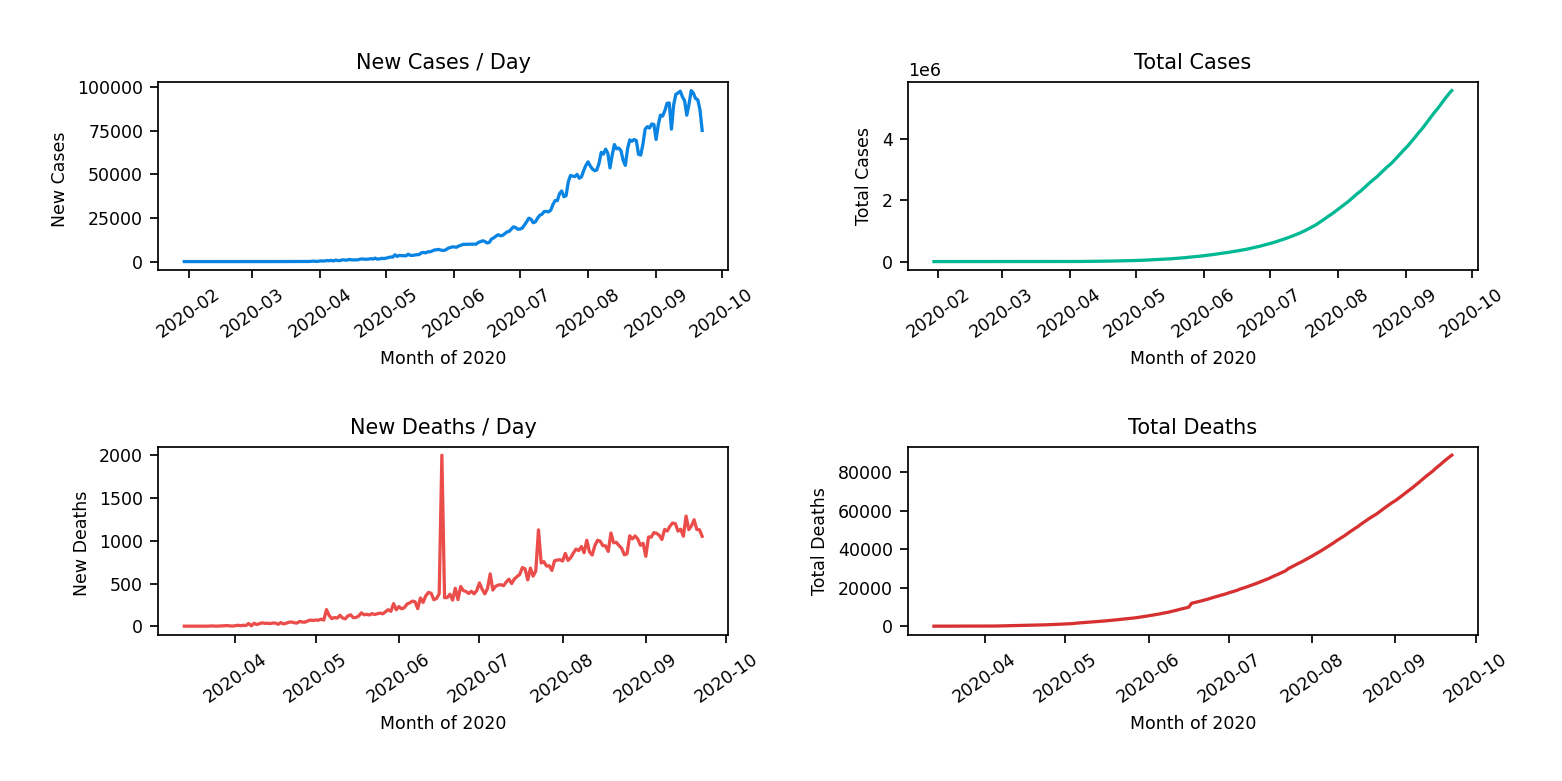

In [236]:
plot_all_data_for_a_country('India', 'line')

<IPython.core.display.Javascript object>


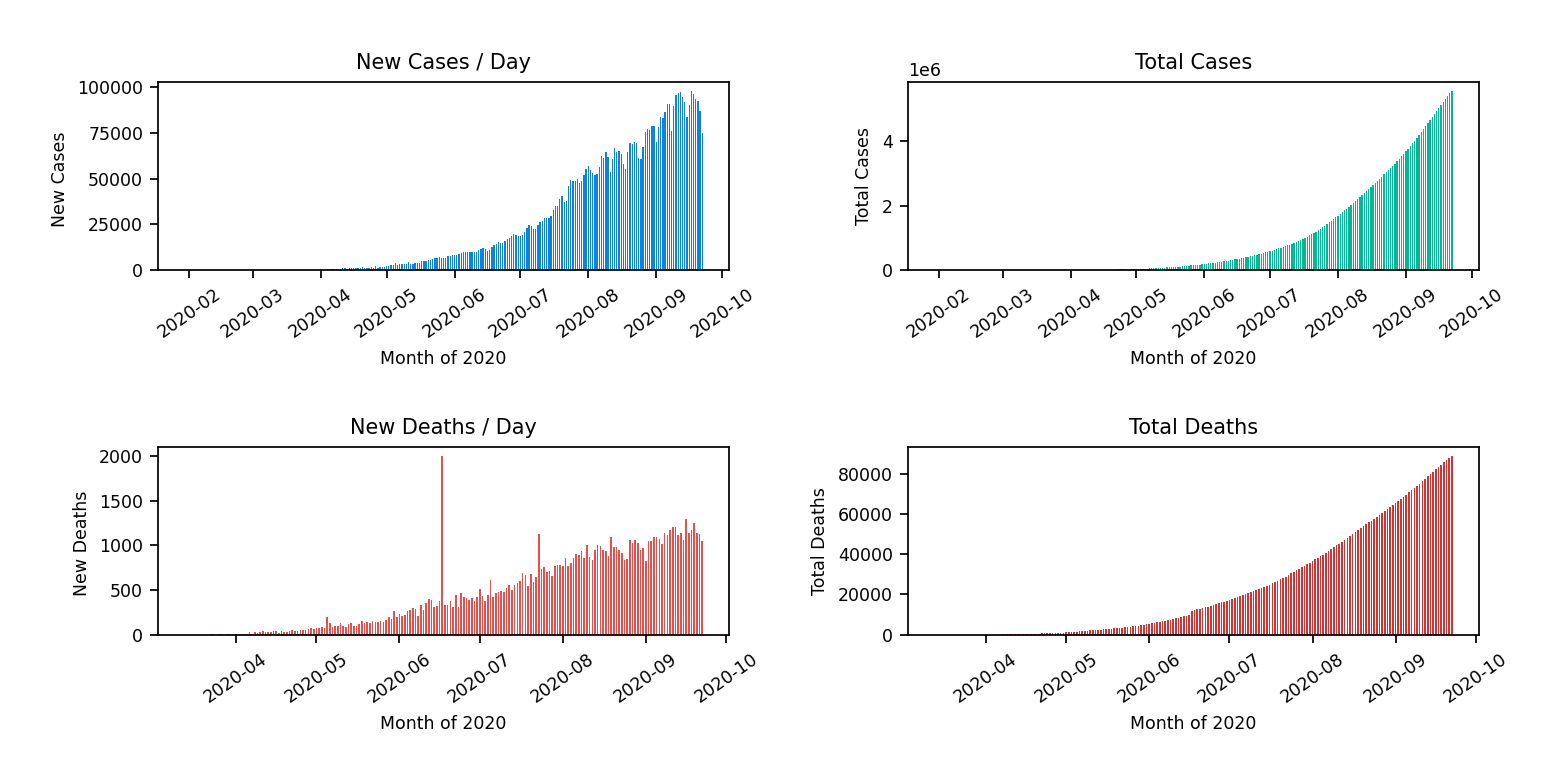

In [237]:
plot_all_data_for_a_country('India', 'bar')

<IPython.core.display.Javascript object>


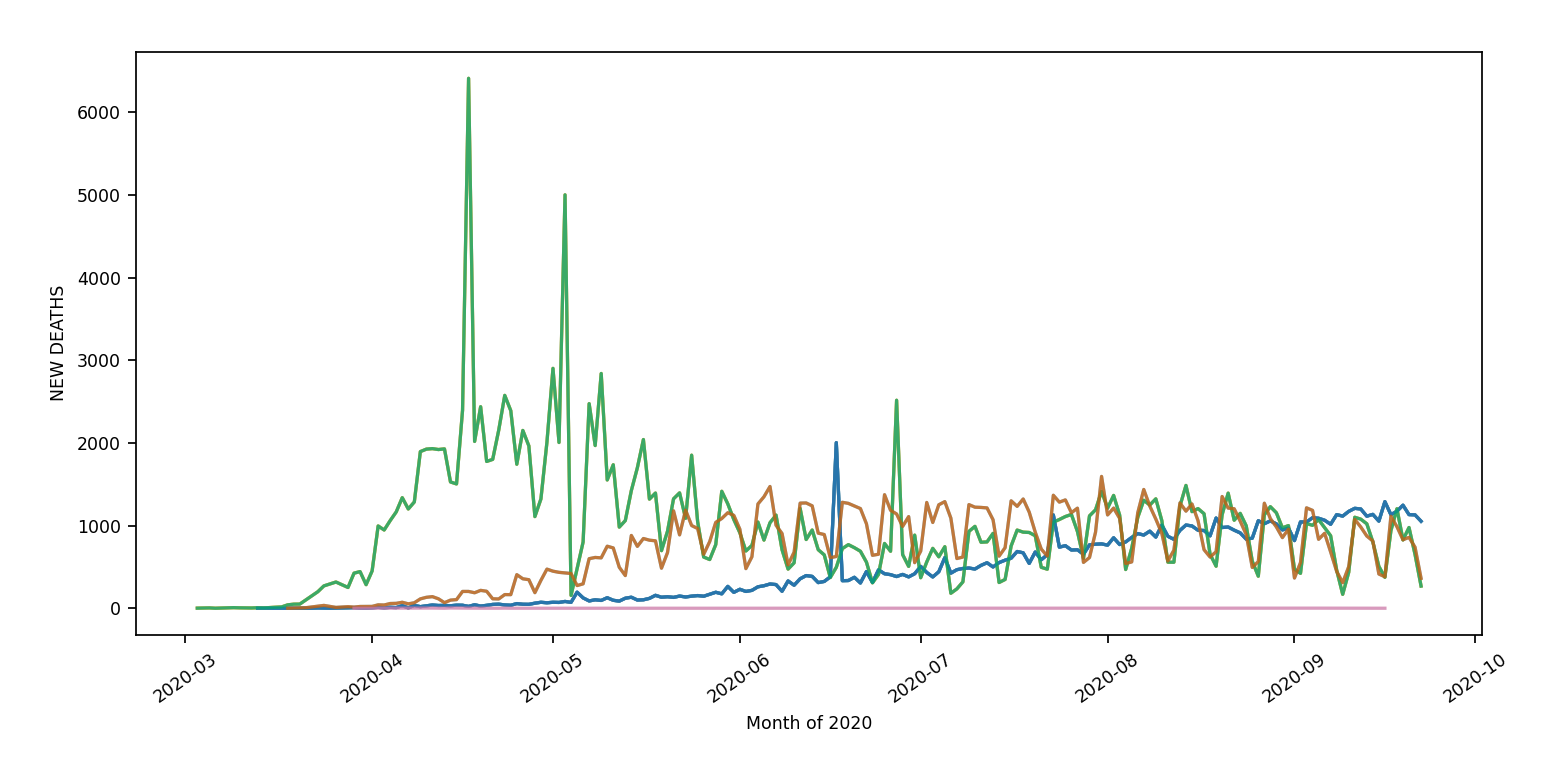

In [235]:
plot_data(countries = ['India', 'United States of America', 'Brazil', 'New Zealand'], plot = 'new deaths', plot_type = 'line')

In [130]:
def get_data_for_pie(date, plot, all_plots):
    number = 5 if all_plots else 10
    
    df1 = pd.read_csv(data)

    df1.rename(columns = {'Date_reported' : "Date"}, inplace = True)
    df1.columns = [i.strip() for i in df1.columns]
    
    d = {
        'total cases' : "Cumulative_cases",
        'new cases' : 'New_cases',
        'total deaths' : 'Cumulative_deaths',
        'new deaths' : 'New_deaths'
    }
    keys = [i for i in d.keys()]
    cases_list = []
    labels_list = []
    
    new_df = df1.groupby("Date").get_group(date).sort_values(by = d[plot], ascending = False)

    all_cases = new_df[d[plot]]
    cases = all_cases / np.sum(all_cases)
    cases = np.append(cases[:number],np.sum(cases[number:]))
    
    labels = new_df['Country_code'][:number]
    labels = np.append(labels, np.array(['others']))
    
    labels_c = new_df['Country'][:number]
    
    labels = {code:country for (code, country) in zip(labels, labels_c)}
    labels['others'] = 'others'
    
    return np.sum(all_cases[:number]), cases, labels

In [141]:
def plot_pie(date, plot = 'total cases', all_plots = False):
        
    if not all_plots:
        fonts = {'verticalalignment': 'bottom',
                 'horizontalalignment': 'left'}
        
        sum_all_cases, cases, labels_dict = get_data_for_pie(date, plot, all_plots)
        labels = [code for code in labels_dict.keys()]
        fig, axis = plt.subplots(1,1, figsize=(10,5))
        
        plt.rc('font', size = 8)
        plt.style.use('seaborn-colorblind')
        
        axis.text(-3,-1.5,s = f'Total Shared Cases = {sum_all_cases}')
        axis.set_title(f'Percentage of {plot.upper()} shared by Top 10 Countries on {date}', pad = 30.0)
        axis.pie(cases, labels = labels, autopct='%1.0f%%', pctdistance = 0.9, radius = 1.3, textprops={'size': 'smaller'});
        
        legend = ''
        
        for k, v in labels_dict.items():
            legend += f"{k}    : {v}\n" 
            
        axis.text(-3,0.2,s=legend)
        
    else:
        keys = ['total cases', 'new cases', 'total deaths', 'new deaths']
        print(keys)
        sum_all_cases_list, cases_list, labels_list = [], [], []
        
        for key in keys:
            sum_all_cases, cases, labels = get_data_for_pie(date, plot = key, all_plots = all_plots)
            
            sum_all_cases_list.append(sum_all_cases)
            cases_list.append(cases)
            labels_list.append(labels)
            
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 5))
        plt.rc('font', size=6.5)
        plt.style.use('seaborn-colorblind')

        axes = [ax1, ax2, ax3, ax4]
        
        for index, axis in enumerate(axes):
            axis.set_title(f'% {keys[index].upper()} shared by Top 5 Countries on {date}')
            axis.pie(cases_list[index], labels = labels_list[index], autopct = '%1.0f%%', pctdistance=0.8)

<IPython.core.display.Javascript object>


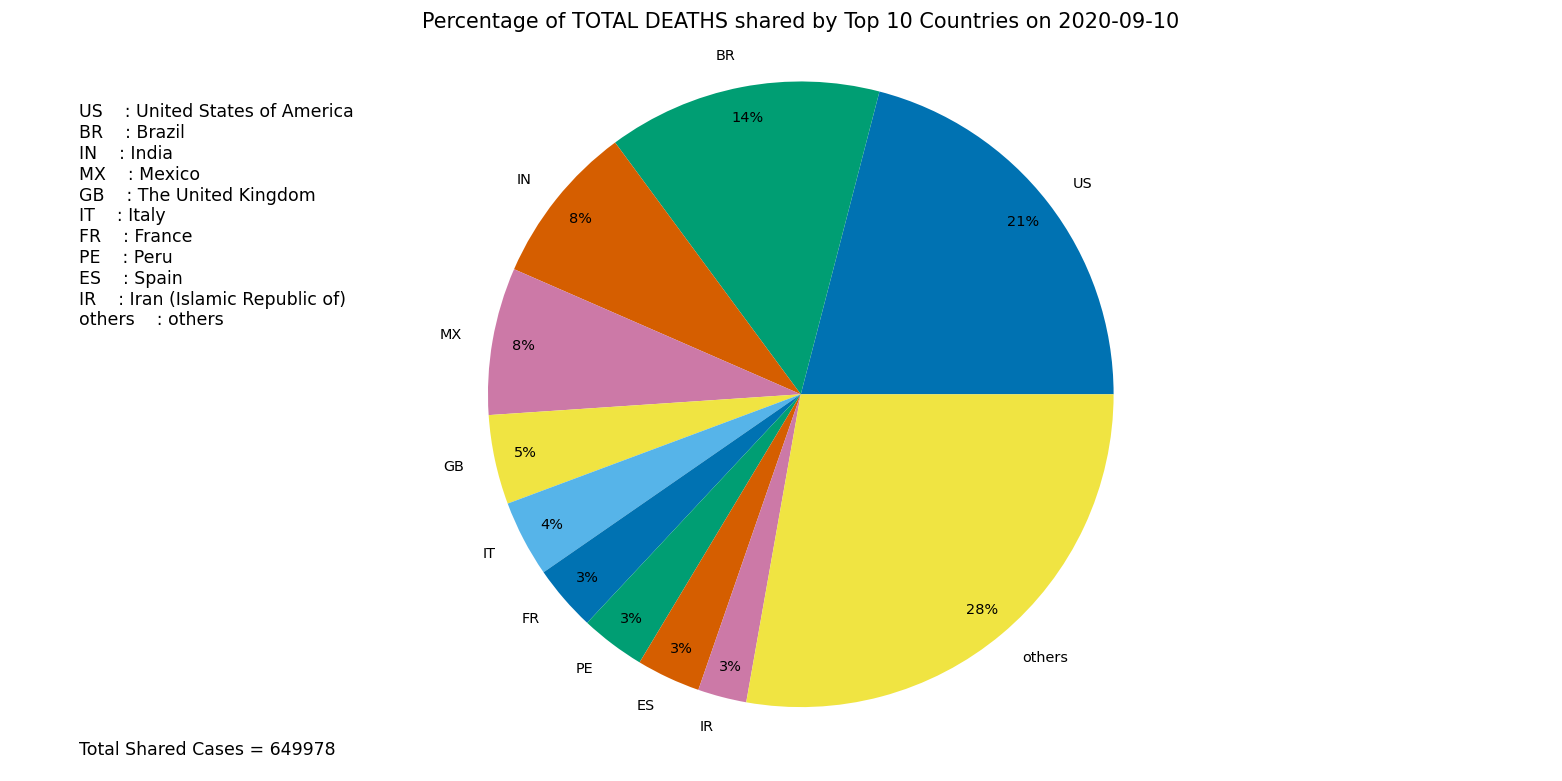

In [150]:
plot_pie('2020-09-10', 'total deaths')

['total cases', 'new cases', 'total deaths', 'new deaths']


<IPython.core.display.Javascript object>


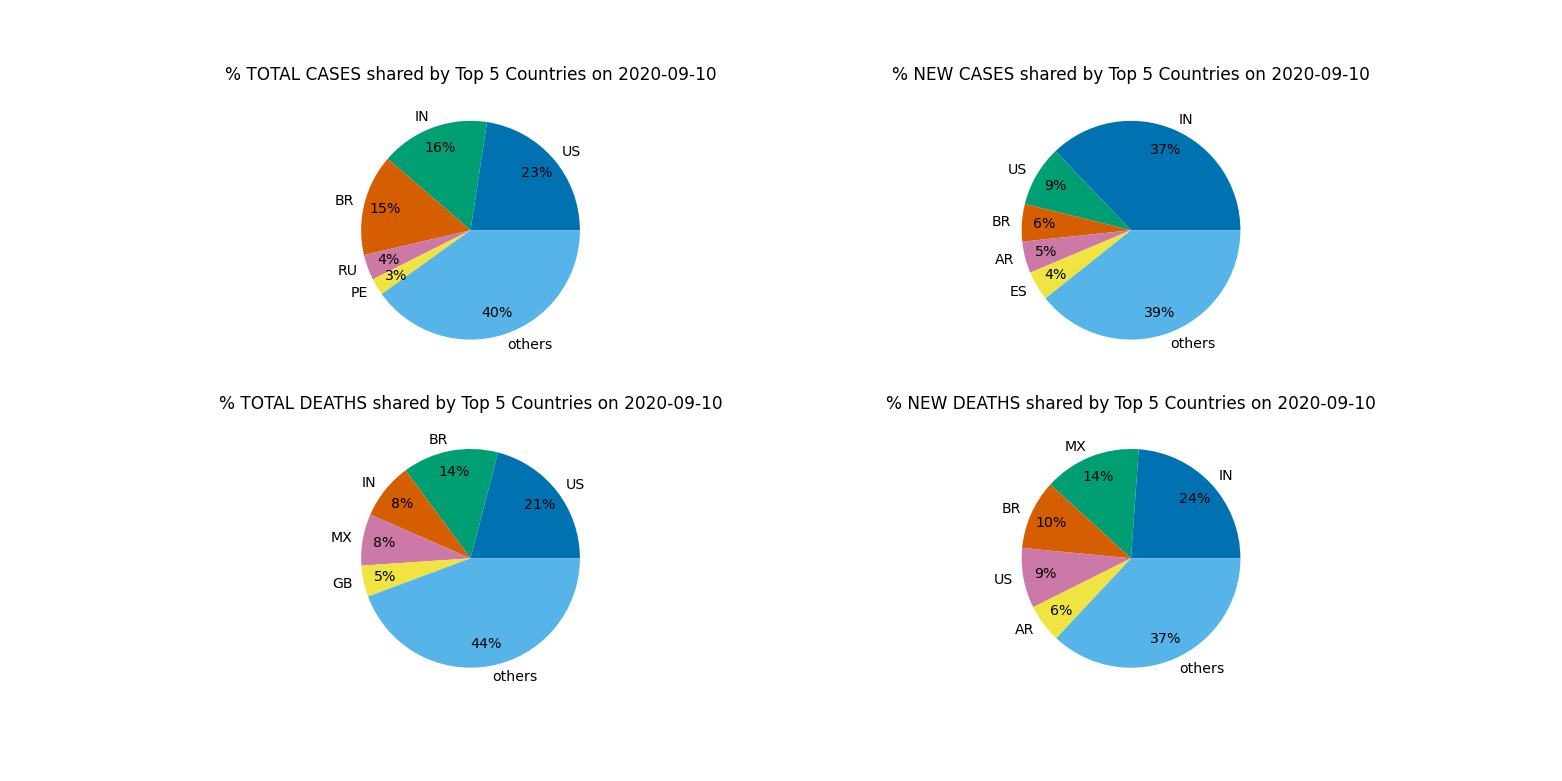

In [145]:
plot_pie('2020-09-10', all_plots = True)

In [31]:
def animate(interval, countries, plot = 'new cases', plot_type = 'line'):
    print('\n\n ANIMATE CALLED \n\n')
    
    # max countries = 3 otherwise it can be clustered
    if not (isinstance(countries, list) or isinstance(countries, tuple)):
        raise TypeError("Please pass in a list/tuple of country/countries")
        return
    
    #def get_country_dictionary(countries, plot, plot_type = 'line', animate = False, start_date = None, end_date = None):
    
    country_dictionary = get_country_dictionary(countries, plot, plot_type)
    
    keys = [i for i in country_dictionary.keys()]
    
    
    longest = country_dictionary[keys[0]]

    start_date, end_date = (longest.index[0], longest.index[-1])

    country_dictionary = get_country_dictionary(countries, plot, plot_type, start_date, end_date)
    
    plt.style.use('seaborn-colorblind')
    #plt.figure(figsize=(10,5))
    plt.xticks(rotation = 45)
    
    plt.ylabel(plot.upper())
    plt.xlabel('Month')
    
    words = [(i[0].upper() + i[1:]) for i in plot.strip().split(' ')]
    to_add = '' if plot.lower().strip().split(' ')[0] != 'new' else '/Day'
    plt.title(words[0] + ' COVID-19 ' + words[1] + to_add) 
    
    
    for country in countries:   
        dates = country_dictionary[country].index

        if plot.lower() == "new cases":
            y = country_dictionary[country]['New_cases']
        
        elif plot.lower() == 'total cases':
            y = country_dictionary[country]['Cumulative_cases']
            
        elif plot.lower() == 'new deaths':
            y = country_dictionary[country]['New_deaths']
            
        elif plot.lower() == 'total deaths':
            y = country_dictionary[country]['Cumulative_deaths']
        
        if plot_type == 'line':
            plt.plot(dates, y, label = country, alpha = 0.75)
        
    
    plt.legend(loc = 'upper left')    
    plt.tight_layout()

In [53]:
%matplotlib notebook  

# plt.figure(figsize=(10,5))
# FuncAnimation(plt.gcf(), animate, blit = True, interval = 1000)

In [160]:
i = get_cases('India')
i['New_cases'].index

DatetimeIndex(['2020-01-30', '2020-02-02', '2020-02-03', '2020-03-02',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09',
               ...
               '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22'],
              dtype='datetime64[ns]', name='Date', length=205, freq=None)

In [183]:
'New Cases'.split('/')

['New Cases']

<IPython.core.display.Javascript object>


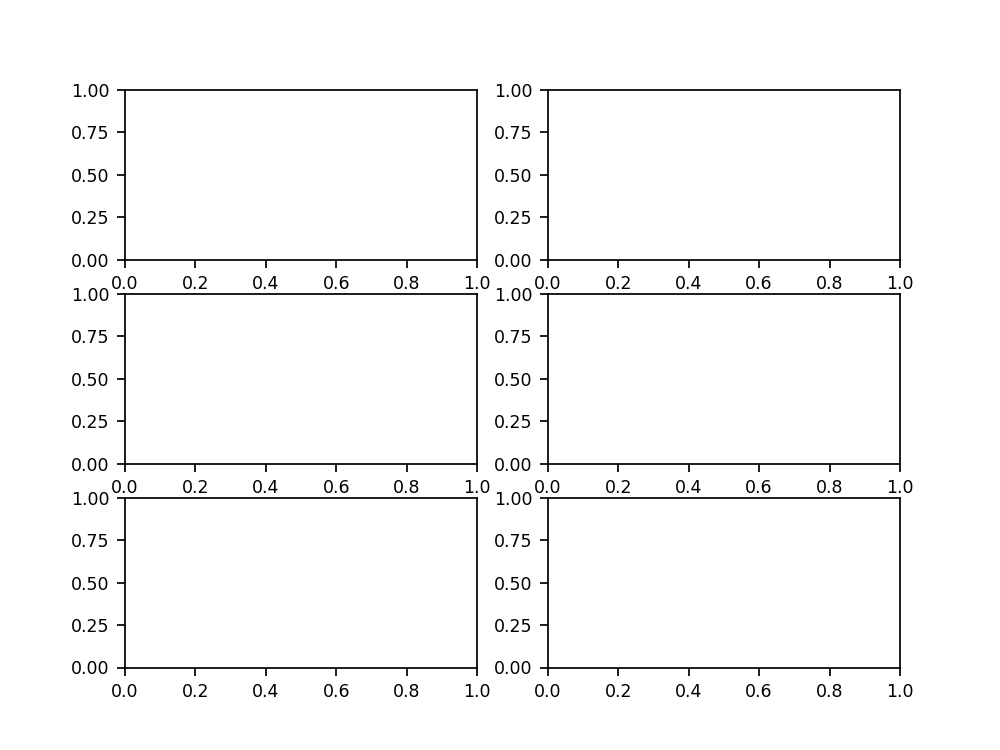

(3, 2)

In [209]:
_, ax = plt.subplots(3,2)
ax.shape